## `About the Dataset`

**House Pricing Dataset:** The Dataset contains 506 observations of house prices across towns near Delhi. The data has been taken from various websites, and then, combined into a CSV file. Corresponding to each house price, data of 18 other variables is available on which price is suspected to depend.

## `Business Problem`

* As a Manager of a Real Estate Company, we have to 'predict the selling potential of the property'.
* Based on the historical data, we have **to predict whether a property will be sold within 3 months of listing or not**.
* From the dataset, **the 'Sold' Variable is the dependent variable** while others are independent variables.

## `Data Dictionary`

- price = Value of the house
- crime_rate = Crime rate in the nearby areas
- resid_area = Proportion of residential area in that particular locality
- air_qual = Quality of air in the neighborhood
- room_num = Average number of rooms in the houses of that locality
- age = How old is the house construction in years
- dist1 = Distance from employment hub 1
- dist2 = Distance from employment hub 2
- dist3 = Distance from employment hub 3
- dist 4 = Distance from employment hub 4
- teachers = Number of teachers per thousand population in the town
- poor_prop = Proportion of poor population in the region
- airport = Is there any airport in the region? (Yes/No)
- n_hos_beds = Number of hospital beds per 1000 population in the town
- n_hot_rooms = Number of hotel rooms per 1000 population in the town
- waterbody = Type of natural fresh water source is there? (lake/ river/ both/ none)
- rainfall = The yearly average rainfall in centimeters
- bus_ter = Is there a bus terminal in the city? (Yes/No)
- parks = Proportion of land assigned as parks and green areas in the town

### Data Import 

In [2]:
pwd

'C:\\Users\\SM\\OneDrive\\Desktop\\Machine Learning'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
house_data = pd.read_csv(r"C:\Users\SM\OneDrive\Desktop\House-Price.csv", header=0)

## `EDA - Exploratory Data Analysis`

In [5]:
house_data.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [6]:
house_data.tail()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
501,22.4,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006,1
502,20.6,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903,1
503,23.9,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES,0.057572,1
504,22.0,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES,0.060694,1
505,19.0,41.93,0.573,6.030,80.8,2.72,2.24,2.64,2.42,19.0,7.88,YES,10.280,10.1520,None,45,YES,0.060336,1


In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

In [8]:
house_data.dtypes.value_counts()

float64    14
object      3
int64       2
dtype: int64

   The data contains 3 categorical variables and 16 quantitative variables.

In [9]:
house_data.shape

(506, 19)

The data contains 506 records and 19 columns in total.

In [10]:
# Reading the data
house_data.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,1.000000


### Missing Values

In [11]:
house_data.isnull().sum()

price          0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
Sold           0
dtype: int64

* 'n_hos_beds' contains 8 missing values.

### Identification of Outliers

<AxesSubplot:ylabel='n_hos_beds'>

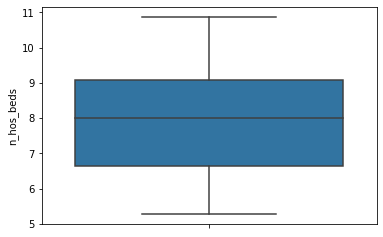

In [12]:
sns.boxplot(y='n_hos_beds', data=house_data)

In [13]:
?sns.boxplot

<AxesSubplot:ylabel='n_hot_rooms'>

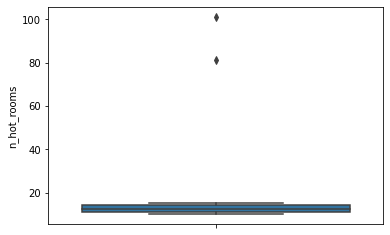

In [14]:
sns.boxplot(y='n_hot_rooms', data=house_data)

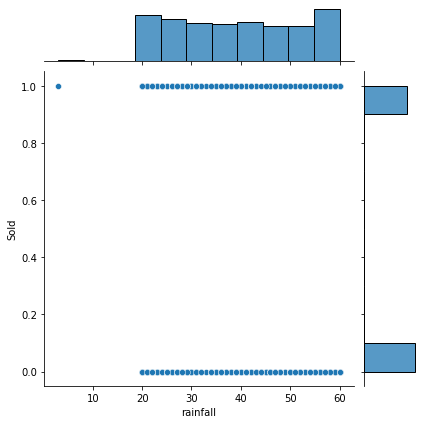

In [15]:
sns.jointplot(x='rainfall', y='Sold', data=house_data)

* There are outliers on the higher end in 'n_hot_rooms' and there is an outlier on the lower end in the 'rainfall' variable.

### Categorical Variables

In [16]:
house_data.dtypes[house_data.dtypes == 'object'].index

Index(['airport', 'waterbody', 'bus_ter'], dtype='object')

<AxesSubplot:xlabel='airport', ylabel='count'>

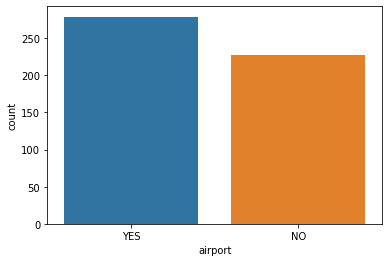

In [17]:
sns.countplot(x='airport', data=house_data)

<AxesSubplot:xlabel='waterbody', ylabel='count'>

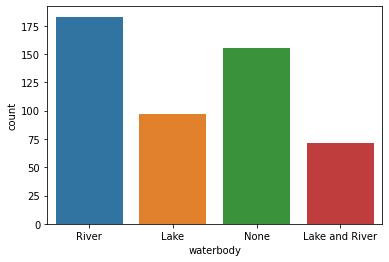

In [18]:
sns.countplot(x='waterbody', data=house_data)

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

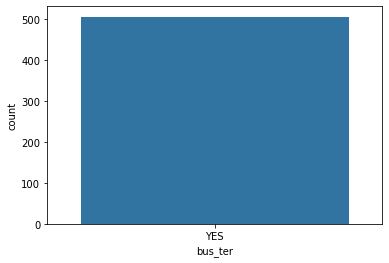

In [19]:
sns.countplot(x='bus_ter', data=house_data)

* 'bus_ter' has only Yes values, so it does not provide any useful insight to our data. This column can be dropped.

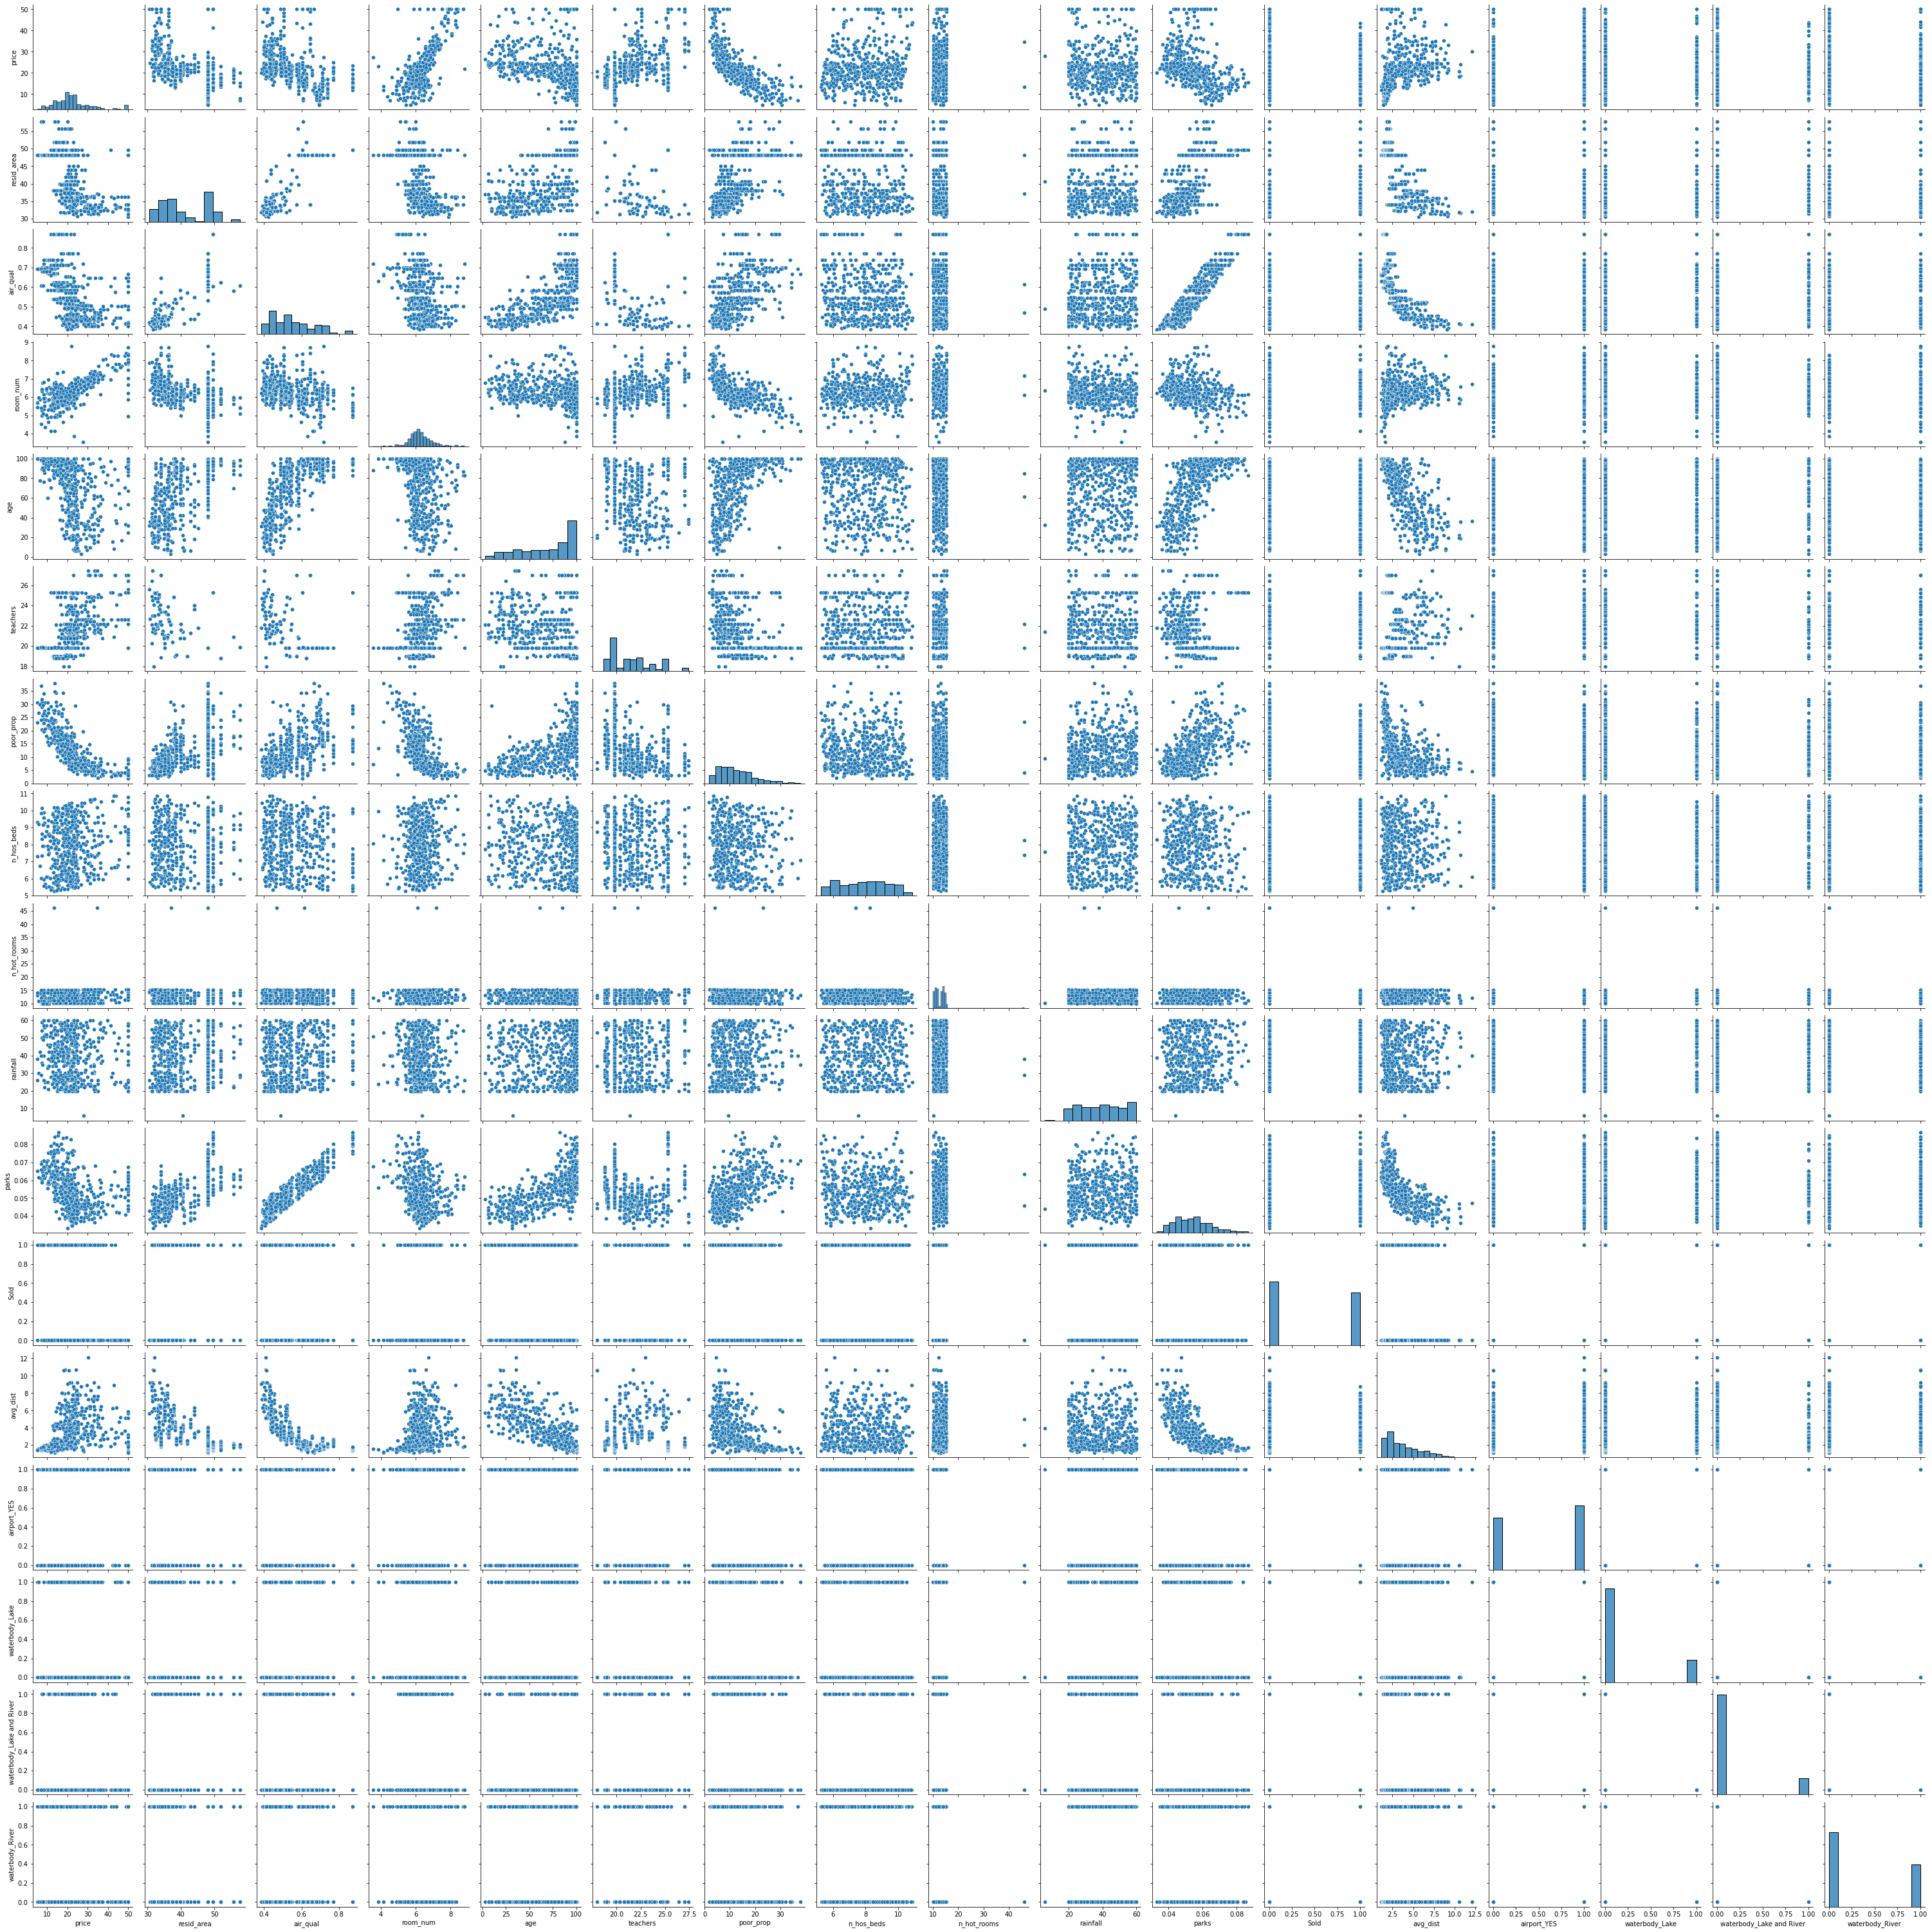

In [72]:
sns.pairplot(data = house_data)

### Outlier Treatment

**n_hot_rooms**

In [20]:
np.percentile(house_data.n_hot_rooms, [99])

array([15.39952])

In [21]:
np.percentile(house_data.n_hot_rooms, [99])[0]

15.39952

In [22]:
uv = np.percentile(house_data.n_hot_rooms, [99])[0]

In [23]:
house_data[(house_data.n_hot_rooms >uv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
2,34.7,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105,0
204,50.0,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178,0
267,50.0,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235,0
369,50.0,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477,0
423,13.4,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344,0


In [24]:
house_data.n_hot_rooms[(house_data.n_hot_rooms > 3*uv)] = 3*uv

C:\Users\SM\AppData\Local\Temp/ipykernel_11404/2349833600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data.n_hot_rooms[(house_data.n_hot_rooms > 3*uv)] = 3*uv


In [25]:
house_data[(house_data.n_hot_rooms >uv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
2,34.7,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,YES,0.052105,0
204,50.0,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,YES,0.044178,0
267,50.0,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,YES,0.063235,0
369,50.0,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,YES,0.067477,0
423,13.4,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344,0


**rainfall**

In [26]:
np.percentile(house_data.rainfall, [1])

array([20.])

In [27]:
np.percentile(house_data.rainfall, [1])[0]

20.0

In [28]:
lv = np.percentile(house_data.rainfall, [1])[0]

In [29]:
house_data[(house_data.rainfall <lv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
213,28.1,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019,1


In [30]:
house_data.rainfall[(house_data.rainfall < 0.3*lv)] = 0.3*lv

C:\Users\SM\AppData\Local\Temp/ipykernel_11404/80325196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data.rainfall[(house_data.rainfall < 0.3*lv)] = 0.3*lv


In [31]:
house_data[(house_data.rainfall < lv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
213,28.1,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,6,YES,0.044019,1


In [32]:
house_data.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,1.000000


### Missing Value Imputation

In [33]:
house_data.isnull().sum()

price          0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
Sold           0
dtype: int64

In [34]:
house_data.n_hos_beds = house_data.n_hos_beds.fillna(house_data.n_hos_beds.mean())

In [35]:
house_data.isnull().sum()

price          0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     0
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
Sold           0
dtype: int64

### Variable Transformation 

In [36]:
house_data['avg_dist'] = (house_data['dist1']+house_data['dist2']+house_data['dist3']+house_data['dist4']) / 4

In [37]:
house_data.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold,avg_dist
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.19200,River,23,YES,0.049347,0,4.0875
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.17280,Lake,42,YES,0.046146,1,4.9675
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,0,4.9675
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.26720,Lake,45,YES,0.047151,0,6.0650
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.28960,Lake,55,YES,0.039474,0,6.0625


In [38]:
del house_data['dist1']

In [39]:
del house_data['dist2']

In [40]:
del house_data['dist3']

In [41]:
del house_data['dist4']

In [42]:
house_data.head(3)

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold,avg_dist
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,23,YES,0.049347,0,4.0875
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,YES,0.046146,1,4.9675
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,0,4.9675


In [43]:
house_data.describe()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,0.454545,3.795104
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,0.498422,2.105859
min,5.000000,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,0.000000,1.127500
25%,17.025000,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,0.000000,2.100625
50%,21.200000,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,0.000000,3.207500
75%,25.000000,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,1.000000,5.187500
max,50.000000,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,1.000000,12.127500


* Since 'Bus_ter' is not giving us any useful insights, we need to drop that variable.

In [44]:
del house_data['bus_ter']

### Dummy Variable Creation

In [45]:
house_data.dtypes[house_data.dtypes == 'object'].index

Index(['airport', 'waterbody'], dtype='object')

In [46]:
house_data = pd.get_dummies(house_data, columns=['airport'], drop_first=True)

In [47]:
house_data.head(4)

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,avg_dist,airport_YES
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,River,23,0.049347,0,4.0875,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,Lake,42,0.046146,1,4.9675,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,None,38,0.045764,0,4.9675,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,Lake,45,0.047151,0,6.0650,1


In [48]:
house_data = pd.get_dummies(house_data, columns=['waterbody'])

In [49]:
house_data.columns

Index(['price', 'resid_area', 'air_qual', 'room_num', 'age', 'teachers',
       'poor_prop', 'n_hos_beds', 'n_hot_rooms', 'rainfall', 'parks', 'Sold',
       'avg_dist', 'airport_YES', 'waterbody_Lake', 'waterbody_Lake and River',
       'waterbody_None', 'waterbody_River'],
      dtype='object')

In [50]:
del house_data['waterbody_None']

In [51]:
house_data.head(4)

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,1,1,0,0


## `Building a Logistic Regression Model`

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [101]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(404, 16) (102, 16) (404,) (102,)


In [102]:
clf_LR = LogisticRegression()
clf_LR.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
y_test_pred = clf_LR.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [105]:
confusion_matrix(y_test, y_test_pred)

array([[37, 21],
       [14, 30]], dtype=int64)

In [106]:
accuracy_score(y_test, y_test_pred)

0.6568627450980392

**Sklearn Method**

In [52]:
X = house_data.loc[:, house_data.columns != 'Sold']

In [53]:
y = house_data['Sold']

In [54]:
X.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0


In [55]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Sold, dtype: int64

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
clf_lr = LogisticRegression()

In [58]:
clf_lr.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
clf_lr.coef_

array([[-0.24636881, -0.01730104, -0.11021603,  0.86273066, -0.00599888,
         0.22817561, -0.21023249,  0.18004917, -0.09084579, -0.00704248,
        -0.00499308, -0.32612505, -0.1052292 , -0.09488318, -0.01512605,
         0.20182743]])

In [60]:
clf_lr.intercept_

array([0.01671406])

**Statsmodel Method**

In [64]:
import statsmodels.api as sn

In [65]:
import statsmodels.discrete.discrete_model as sm

In [66]:
X_const = sn.add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [67]:
X_const.head()

,const,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,1.0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,1.0,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,1.0,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,1.0,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,1.0,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0


In [68]:
logit = sm.Logit(y, X_const).fit()

Optimization terminated successfully.
         Current function value: 0.556433
         Iterations 6


In [70]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      489
Method:                           MLE   Df Model:                           16
Date:                Sat, 23 Jul 2022   Pseudo R-squ.:                  0.1924
Time:                        16:26:35   Log-Likelihood:                -281.56
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 9.930e-21
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.1383      2.649     -0.807      0.420      -7.331       3.054
price                       -0.2741      0.033     -8.313      0.000      -0.339      -0.209
resid_area                   0.0192      0.027      0.720      0.471      -0.033       0.071
air_qual                    -7.4183      2.691     -2.757      0.006     -12.693      -2.144
room_num                     1.1067      0.277      4.001      0.000       0.565       1.649
age                         -0.0020      0.007     -0.302      0.762      -0.015       0.011
teachers                     0.3150      0.064      4.937      0.000       0.190       0.440
poor_prop                   -0.2077      0.034     -6.149      0.000      -0.274      -0.141
n_hos_beds                   0.1760      0.071      2.467      0.014       0.036       0.316
n_hot_rooms                 -0.0742      0.052     -1.439      0.150      -0.175       0.027
rainfall                    -0.0033      0.008     -0.394      0.693      -0.020       0.013
parks                       29.1089     24.177      1.204      0.229     -18.277      76.495
avg_dist                    -0.4017      0.098     -4.118      0.000      -0.593      -0.211
airport_YES                 -0.1524      0.211     -0.723      0.469      -0.565       0.261
waterbody_Lake              -0.1032      0.304     -0.340      0.734      -0.698       0.492
waterbody_Lake and River    -0.0626      0.328     -0.191      0.849      -0.705       0.580
waterbody_River              0.2394      0.256      0.937      0.349      -0.262       0.740
============================================================================================
"""

* (-) or (+) sign defines the relationship of the independent variable with the dependent variable, whether direct or inverse. Thus, resid_area, room_num, teachers, n_hos_beds, parks and waterbody(River) impacts the Sold Variable positively while others impact it negatively.
* The lower the p-value, the higher the chances of the independent variable impacting y, thus, air_qual, room_num,  poor_prop, teachers, and avg_dist is impacting the Sold Variable the most.

### Prediction of 'y' values and Creating a Confusion Matrix

*Firstly, we will predict the values of y and from that predicted values of y, we will create a Confusion Matrix.*

In [73]:
clf_lr.predict_proba(X)

array([[0.12706767, 0.87293233],
       [0.39754355, 0.60245645],
       [0.98070461, 0.01929539],
       ...,
       [0.28590453, 0.71409547],
       [0.2805606 , 0.7194394 ],
       [0.16346979, 0.83653021]])

*The first column is the probability of 0 = probability of not sold, the second column is the probability of 1 = the probability of sold.*

**The Boundary Condition here is 0.5. That is, probability greater than 0.5 implies that the house has been sold within three months and the probability less than 0.5 implies that the house has not been sold within three months.**

In [74]:
y_pred = clf_lr.predict(X)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [75]:
# To set custom boundary conditions, using predict_proba
# Custom Probability = 0.3
y_pred_03 = (clf_lr.predict_proba(X)[:,1] >= 0.3)

In [76]:
y_pred_03

array([ True,  True, False,  True, False, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False,

**Confusion Matrix**

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
# Creating Confusion Matrix for the y_pred where the boundary condition is 0.5.
confusion_matrix(y, y_pred)

array([[196,  80],
       [ 81, 149]], dtype=int64)

In [79]:
# Creating Confusion Matrix for the y_pred where the boundary condition is 0.3.
confusion_matrix(y, y_pred_03)

array([[121, 155],
       [ 18, 212]], dtype=int64)

*Reducing the threshold means we are inflating the predicted yes results.*

### Performance Metrics

* i) Precision 
* ii) Recall
* iii) AUC(ROC)

In [80]:
from sklearn.metrics import precision_score, recall_score

In [81]:
precision_score(y, y_pred)

0.6506550218340611

In [82]:
recall_score(y, y_pred)

0.6478260869565218

In [83]:
from sklearn.metrics import roc_auc_score

In [84]:
roc_auc_score(y, y_pred)

0.6789855072463769

## `Linear Discriminant Analysis`

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [86]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X, y)

LinearDiscriminantAnalysis()

In [87]:
y_pred_lda = clf_lda.predict(X)

In [88]:
y_pred_lda

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [89]:
confusion_matrix(y, y_pred_lda)

array([[192,  84],
       [ 79, 151]], dtype=int64)

## `K-Nearest Neighbours`

In [106]:
from sklearn import preprocessing

In [108]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)

In [109]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s = scaler.transform(X_test)

In [110]:
X_test_s

array([[ 3.46427198e-02, -1.26009787e+00, -7.59976330e-01, ...,
        -4.93864798e-01, -3.98862018e-01, -7.54473836e-01],
       [ 3.08888478e+00,  1.09537107e+00,  6.84309089e-01, ...,
        -4.93864798e-01, -3.98862018e-01, -7.54473836e-01],
       [ 7.92301952e-02,  4.28041039e-01,  1.73890573e-04, ...,
        -4.93864798e-01, -3.98862018e-01, -7.54473836e-01],
       ...,
       [-4.00085165e-01, -9.60512654e-01, -8.19099125e-01, ...,
        -4.93864798e-01, -3.98862018e-01,  1.32542701e+00],
       [ 6.47720506e-01, -9.50442563e-02, -5.15039037e-01, ...,
        -4.93864798e-01, -3.98862018e-01, -7.54473836e-01],
       [-2.77469608e-01, -4.16820968e-01, -2.53209516e-01, ...,
        -4.93864798e-01,  2.50713268e+00, -7.54473836e-01]])

**Case 1: k=1**

In [112]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors=1)
clf_knn_1.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=1)

In [114]:
confusion_matrix(y_test, clf_knn_1.predict(X_test_s))

array([[30, 28],
       [19, 25]], dtype=int64)

In [116]:
accuracy_score(y_test, clf_knn_1.predict(X_test_s))

0.5392156862745098

**Case 2: k=3**

In [117]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_3 = KNeighborsClassifier(n_neighbors=3)
clf_knn_3.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=3)

In [118]:
confusion_matrix(y_test, clf_knn_3.predict(X_test_s))

array([[32, 26],
       [21, 23]], dtype=int64)

In [119]:
accuracy_score(y_test, clf_knn_3.predict(X_test_s))

0.5392156862745098

**How to create a Single Model for multiple values of K?**

In [121]:
from sklearn.model_selection import GridSearchCV

In [126]:
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

In [129]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)

In [130]:
grid_search_cv.fit(X_train_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [131]:
# Best Value of K
grid_search_cv.best_params_

{'n_neighbors': 9}

In [138]:
# Best Model to be fitted
ab = grid_search_cv.best_estimator_

In [141]:
y_test_pred = ab.predict(X_test_s)

In [142]:
confusion_matrix(y_test, y_test_pred)

array([[36, 22],
       [18, 26]], dtype=int64)

In [143]:
accuracy_score(y_test, y_test_pred)

0.6078431372549019